# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Honors-Physics-PHYS1010" data-toc-modified-id="Honors-Physics-PHYS1010-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Honors Physics PHYS1010</a></div><div class="lev1 toc-item"><a href="#Fractals-in-Python" data-toc-modified-id="Fractals-in-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fractals in Python</a></div><div class="lev2 toc-item"><a href="#1.-Setup-the-Environment" data-toc-modified-id="1.-Setup-the-Environment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1. Setup the Environment</a></div><div class="lev2 toc-item"><a href="#2.-Generating-the-Mandelbrot-Set" data-toc-modified-id="2.-Generating-the-Mandelbrot-Set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2. Generating the <a href="https://en.wikipedia.org/wiki/Mandelbrot_set" target="_blank">Mandelbrot Set</a></a></div><div class="lev2 toc-item"><a href="#3.-Generate-a-Fractal-Image" data-toc-modified-id="3.-Generate-a-Fractal-Image-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>3. Generate a Fractal Image</a></div><div class="lev2 toc-item"><a href="#4.-The-Julia-Set" data-toc-modified-id="4.-The-Julia-Set-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>4. The <a href="https://en.wikipedia.org/wiki/Julia_set" target="_blank">Julia Set</a></a></div><div class="lev4 toc-item"><a href="#OPTIONAL-Choosing-Colors-with-Math" data-toc-modified-id="OPTIONAL-Choosing-Colors-with-Math-2.4.0.1"><span class="toc-item-num">2.4.0.1&nbsp;&nbsp;</span>OPTIONAL Choosing Colors with Math</a></div><div class="lev3 toc-item"><a href="#Useful-numpy-Functions:-Call-by-using-numpy.function" data-toc-modified-id="Useful-numpy-Functions:-Call-by-using-numpy.function-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Useful numpy Functions: Call by using numpy.function</a></div>

# Honors Physics PHYS1010

# Fractals in Python

Here we will demonstrate how to generate fractal images using the coding language python

## 1. Setup the Environment

Here we import the packages we need from the existing python libraries. Python has extensive libraries of functions that saves us from having to write them ourselves.

In [1]:
from PIL import Image, ImageDraw
import math, colorsys, numpy
from matplotlib import colors
from IPython.display import Image as ipythonImage

This sets up the colors we want in our fractal image.

How this works:
We are building an array of values that correspond to our colors. Colors are defined in Python as a list of three values corresponding to the percentage of Red, Green, and Blue in that color.
Black is (0.0, 0.0, 0.0) and White is (1.0, 1.0, 1.0)

Feel free to change the colors as you wish. The list of prenamed colors is porvided below. Later we will see another way to generate the colors using math.

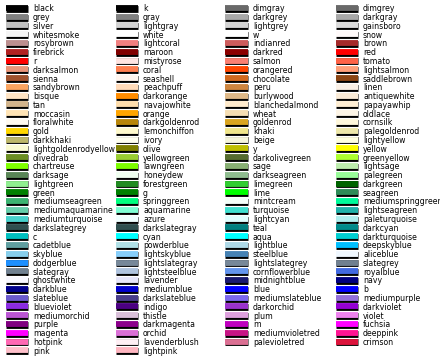

In [2]:
ipythonImage(filename = "named_colors.png")

In [3]:
color_list=('black',
            'darkslategray',
            'darkgreen',
            'green',
            'forestgreen',
            'darkseagreen',
            'limegreen',
            'lime',
            'palegreen',
            'white')

In [4]:
palette = []
palette.append( colors.hex2color(colors.cnames[color_list[0]]) )
palette.append( colors.hex2color(colors.cnames[color_list[1]]) )
palette.append( colors.hex2color(colors.cnames[color_list[2]]) )
palette.append( colors.hex2color(colors.cnames[color_list[3]]) )
palette.append( colors.hex2color(colors.cnames[color_list[4]]) )
palette.append( colors.hex2color(colors.cnames[color_list[5]]) )
palette.append( colors.hex2color(colors.cnames[color_list[6]]) )
palette.append( colors.hex2color(colors.cnames[color_list[7]]) )
palette.append( colors.hex2color(colors.cnames[color_list[8]]) )
palette.append( colors.hex2color(colors.cnames[color_list[9]]) )

## 2. Generating the [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set)

As we covered in the slides, The Mandelbrot Set is the set of complex numbers, C, such that the following equation does not diverge when iterated from $z = 0$:

\begin{split}
z_{n+1}= z_{n}^{2} + c
\end{split}




To determine if the equation is diverging, we need to set up a test.

To do so, we will use a loop and check if the absolute value of $z_{n}$ is larger than a cutoff.

We define a function to do this that accepts an input value for $c$ and returns $-1$ if $c$ is in the Mandelbrot Set and the iteration that diverged if not.


In [5]:
cutoff = 2.0
def iterate_series(c):
    z_n = complex(0,0)
    for n in range(0,100):
        z_n = z_n*z_n + c
        if abs(z_n) > cutoff:
            return n
    return -1

Let's test our function

In [6]:
iterate_series(1)

2

In [7]:
iterate_series(0)

-1

In [8]:
iterate_series(-1)

-1

## 3. Generate a Fractal Image

Now that we can determine if a value is in the Mandelbrot Set, let's build the structure of our image.

In [9]:
x_max = 800
y_max = 800

In [10]:
img = Image.new("RGB",(x_max,y_max))
d = ImageDraw.Draw(img)

We are going to loop over all the pixels in our image and check if that pixel is in the Mandelbrot Set.  We are using the $x$ and $y$ coordinates to represent the Real and Imaginary parts of the Complex number $z$.

In [11]:
for x in range(x_max):
    for y in range(y_max):
        #This determines the centering of our image
        offset=(2.2,1.5)
        #The value of c is determined by scaling the pixel location and offsetting it.
        c = complex(x*3.0/x_max-offset[0], y*3.0/y_max-offset[1])
        #Now we call our function from before
        n = iterate_series(c)
        
        #Checks if c is in the Mandelbrot Set            
        if n == -1: 
            v=1
        #If not, it checks when it diverged    
        else: 
            v=n/100.0
        
        #Determines the colors in our image based on our the previous check
        color_index = int(v * (len(palette)-1))
        rgb = palette[color_index]
        red = int(rgb[0]*255)
        green = int(rgb[1]*255)
        blue = int(rgb[2]*255)

        d.point((x,y),fill = (red,green,blue))


Now we save our image and display it.

In [12]:
img.save("fractal.png")

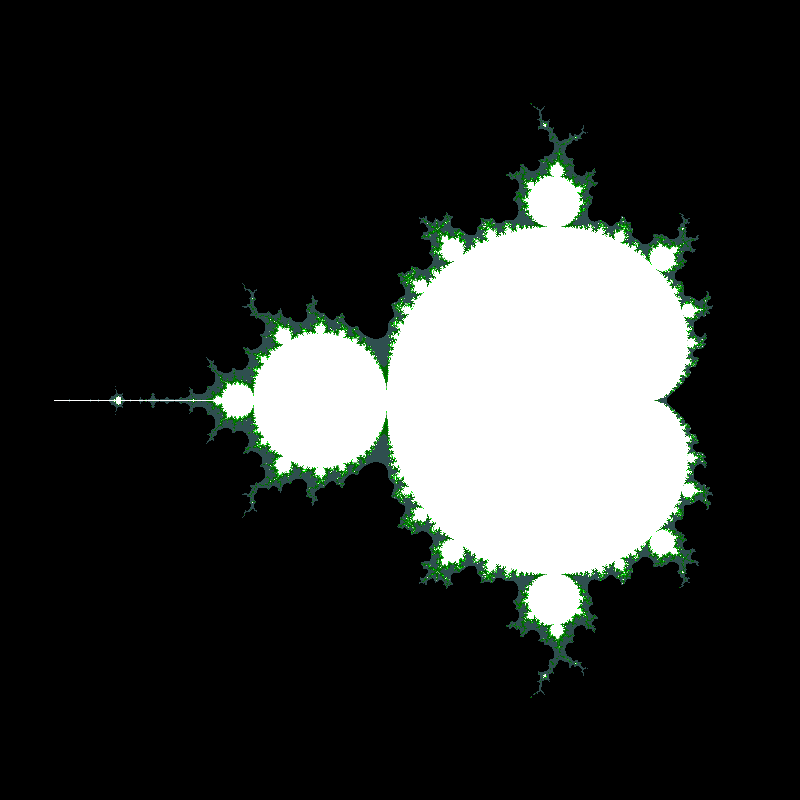

In [13]:
ipythonImage(filename='fractal.png')

## 4. The [Julia Set](https://en.wikipedia.org/wiki/Julia_set)

It turns out that there are more ways to make a fractal. We are going to open up some of the parameters and see what happens.

First we open up our value of $z_n$ and redefine our iteration function.

We have also pulled out the functional form that defines our set, this will make it easier to modify this without breaking anything in our iterate function.

In [14]:
def func_z_n(c, z_n):
    #return z_n*z_n +c
    return numpy.power(z_n,2) + c

In [15]:
cutoff = 2
def iterate_series2(c, z_n = -2.0**.5):
    for n in range(0,100):
        z_n = func_z_n(c, z_n)
        if abs(z_n) > cutoff:
            return n
    return -1

Now we open up the value of c to be defined by us and let the pixel location relate to the value of $z_{n}$

In [16]:
c_julia = complex(-0.4, 0.6)

#### OPTIONAL Choosing Colors with Math

The cell below chooses colors for us based on an algorithm rather than specifying the colors in advance. It takes some tweaking to get it to look right but some of the results are spectacular.

In [17]:
#The max number of colors it can handle
#colors_max = 50
colors_max = 500

#Coefficients for tweaking the percentage of each color we use
r1, g1, b1 = .66, 1.0, 0.0  # Between 0.0 and 1.0
r2, g2, b2 = 3.0, -2.0, 1.0 # Must be greater than 1.0 or less than -1.0
r3, g3, b3 = 0.25, 0.25, 0.25  # Between 0.0 and 1.0


# Calculate a tolerable palette
palette = [0] * colors_max
for i in range(colors_max):
    f = 1-abs((float(i)/colors_max-1)**15)
    
    #r, g, b = colorsys.hsv_to_rgb(.66+f/3, 1-f/2, f)
    r, g, b = colorsys.hsv_to_rgb(r1+f/r2, g1+f/g2, b1+f/b2)
    #palette[i] = (int(r*255), int(g*255), int(b*255))
    palette[i] = (int((r-r3)*255), int((g-g3)*255), int((b-b3)*255))


In [18]:
for x in range(x_max):
    for y in range(y_max):
        offset=(1.5, 1.5)
        z = complex(x*3.0/x_max-offset[0], y*3.0/y_max-offset[1])
        n = iterate_series2(c_julia, z)
        
            
        if n == -1:
            v=1
        else:
            v=n/100.0
        
        color_index = int(v * (len(palette)-1))
        rgb = palette[color_index]
        red = int(rgb[0]*255)
        green = int(rgb[1]*255)
        blue = int(rgb[2]*255)

        d.point((x,y),fill = (red,green,blue))
        
        #If you want to play with the colors another way, uncomment this and run the color pallet cell above.
        #Don't forget to comment out the line above first
        
        #d.point((x, y), fill = palette[int(v * (colors_max-1))])



By changing the name here, you can save multiple files without having to modify too much code

In [19]:
name = "julia"

In [20]:
img.save(name+".png")

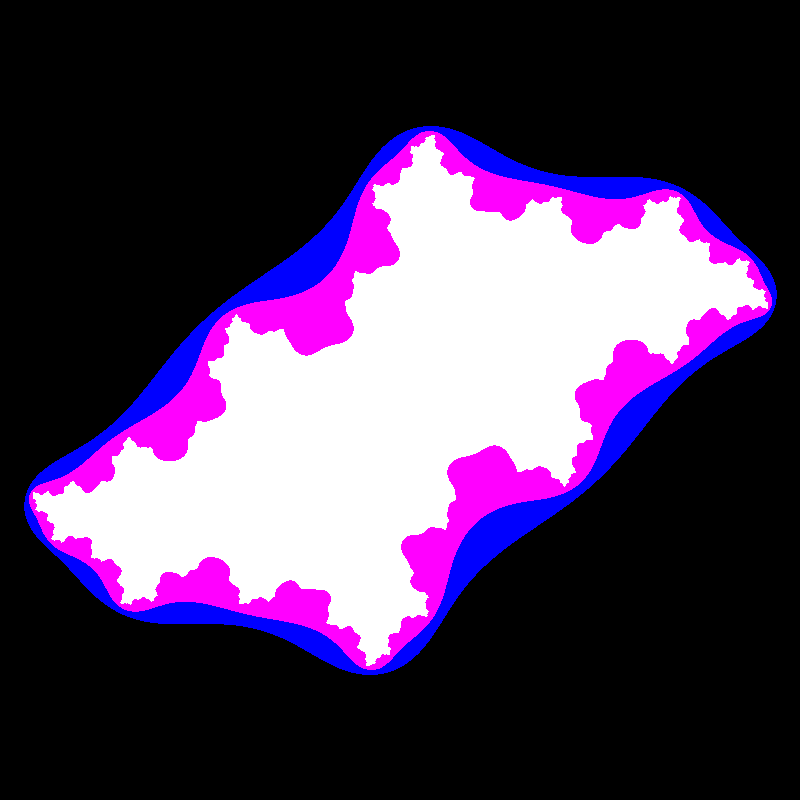

In [21]:
ipythonImage(filename = name+".png")

### Useful numpy Functions: Call by using numpy.function

Try some of these in the definition of our set and see what happens.

|Trig Functions|Hyperbolic Functions|Exponentials and Logs|
|:---:|:---:|:---:|
|`sin(x)`|`sinh(x)`|`exp(x)`|
|`cos(x)`|`cosh(x)`|`log(x)`|
|`tan(x)`|`tanh(x)`|`log10(x)`|
|`arcsin(x)`|`arcsinh(x)`|`power(x,y)`|
|`arccos(x)`|`arccosh(x)`|`sqrt(x)`|
|`arctan(x)`|`arctanh(x)`||
